# Assignment 4. Growth of Turbulent Boundary Layer

In the Notebook we have found a function that computes, for every $c_f$ the corresponding value of $\text{Re}_\delta$ (and, consequently, $\delta$). 

1. Use this function to find a power fit of the type 

$$
c_f = K \text{Re}_\delta^n
$$

2.  Use this to define a function for the friction velocity as a function of $\delta$ and $U$, `u_tau(delta, U)`

3. Introduce this function into the log-law to find a cloud of points $(y,u)$ and fit again witha power law

$$ 
\left(\frac{u}{U}\right) = K'\left(\frac{y}{\delta}\right)^m
$$

This is know as the power-law for the turbulent boundary layer. It is, as the log-law, valid only for $y^+ \gtrapprox 30$

4. Finally use the von Kármán equation for steady uniform flow, equation (28), to find how a turbulent boundary layer grows, $\delta(x)$.

---------------------------------
# A3: GROUP 1 SOLUTION (Pol Padilla, Ferran de Miguel, Alejandro Sanchez)
---------------------------------

## 0. Importing basic libraries:

In [276]:
import pandas as pd
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt
from scipy.optimize import brentq
from scipy.integrate import simpson
from IPython.display import Latex
import sympy as sp
import scipy.optimize as opt

# PRINT COLORS:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [277]:
#Cf_array = np.linspace(0.001,0.005,1000)
#Cf_array = np.linspace(0.0005,0.001,1000)
Cf_array = np.logspace(-2.4,-2.8,100)
ReDelta_array = 0.182058646604666*np.exp(0.579827560572969/np.sqrt(Cf_array))/np.sqrt(Cf_array)
print(ReDelta_array)

[  28263.40782928   29638.27463386   31086.23113668   32611.47117992
   34218.4460209    35911.88111823   37696.79407458   39578.51381992
   41562.70112551   43655.37054568   45862.91389191   48192.12535175
   50650.22837378   53244.90444915   55984.32393028   58877.17903845
   61932.71922348   65160.78905184   68571.86881299   72177.11804905
   75988.42222881   80018.44280464   84280.67090996   88789.48497539
   93560.21256369   98609.19674823  103953.86738519  109612.81765855
  115605.88630721  121954.24597717  128680.49817743  135808.77535786
  143364.85066944  151376.25601353  159872.40903711  168884.74978498
  178446.88777939  188594.76036156  199366.80319953  210804.13394265
  222950.75008551  235853.74219403  249563.52374413  264134.07892963
  279623.22991202  296092.92511061  313609.55026899  332244.26418332
  352073.36114111  373178.66229658  395647.93840293  419575.36653275
  445062.02364867  472216.420138    501155.07669944  532003.14827025
  564895.09900949  599975.4327108 

0.020538791725520263 -0.16223392355753888


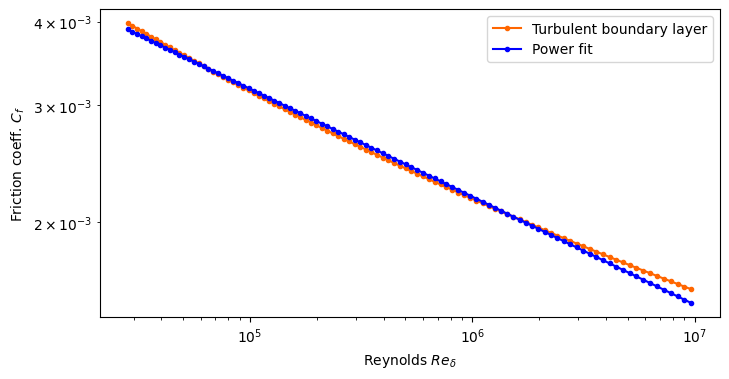

In [278]:
def func_power(ReDelta, K, n):
    return K*ReDelta**n

popt, pcov = opt.curve_fit(func_power,ReDelta_array,Cf_array)
[Kres,nres] = popt
print(Kres,nres)


Cf_data_power = func_power(ReDelta_array,Kres,nres)

fig,ax = plt.subplots(figsize=(8,4))
ax.plot(ReDelta_array,Cf_array,'.-',color=(1,0.4,0))
ax.plot(ReDelta_array,Cf_data_power,'.-',color=(0,0,1))
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'Reynolds $Re_\delta$')
ax.set_ylabel(r'Friction coeff. $C_f$')
ax.legend(['Turbulent boundary layer', 'Power fit'])

In [279]:
Cf, K, Re_delta, n, tau_w, u_tau, delta, U, nu = sp.symbols('C_f,K,Re_delta,n,tau_w,u_tau,delta,U,nu', positive=True, real=True)

eq1 = sp.Eq(Cf,2*(u_tau/U)**2)
eq1

Eq(C_f, 2*u_tau**2/U**2)

In [280]:
eq2 = eq1.replace(Cf,K*Re_delta**n)
eq2

Eq(K*Re_delta**n, 2*u_tau**2/U**2)

In [281]:
eq3 = eq2.replace(Re_delta,delta*U/nu)
eq3

Eq(K*(U*delta/nu)**n, 2*u_tau**2/U**2)

In [282]:
u_tau_solve = sp.solve(eq3,u_tau)
display(u_tau_solve[0])

sqrt(2)*sqrt(K)*U**(n/2 + 1)*delta**(n/2)*nu**(-n/2)/2

In [283]:
y_plus,u_plus, y_delta,u_U = sp.symbols('y_plus,u_plus,y_delta,u_U', positive=True, real=True)

y_delta_eq = sp.Eq(y_delta, y_plus*nu/(u_tau*delta))
display(y_delta_eq)

u_U_eq = sp.Eq(u_U, u_plus*u_tau / U)
display(u_U_eq)

eq4 = sp.Eq(K*Re_delta**n,delta*U/nu)



Eq(y_delta, nu*y_plus/(delta*u_tau))

Eq(u_U, u_plus*u_tau/U)

In [284]:
y_plus_array = np.linspace(30,10e3)
a,b = 0.41,0.50
x_plus_array = (1/a)*np.log(y_plus_array) + b

In [285]:
nu_par = 1.5e-5